In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta, date
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [3]:
df = pd.read_csv(
    'Dataset_Uber_Traffic.csv',
    parse_dates=['DateTime'],
    index_col='DateTime',
    date_parser=lambda x: pd.to_datetime(x, format='%d/%m/%y %H:%M')
)


C:\Users\nites\AppData\Local\Temp\ipykernel_924\3892725860.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(


In [124]:
df.head()

Junction  Vehicles  Year  Month  Day  Hour
DateTime                                                       
2015-11-01 00:00:00         1        15  2015     11    1     0
2015-11-01 01:00:00         1        13  2015     11    1     1
2015-11-01 02:00:00         1        10  2015     11    1     2
2015-11-01 03:00:00         1         7  2015     11    1     3
2015-11-01 04:00:00         1         9  2015     11    1     4

In [5]:
df.info

<bound method DataFrame.info of                      Junction  Vehicles           ID
DateTime                                            
2015-11-01 00:00:00         1        15  20151101001
2015-11-01 01:00:00         1        13  20151101011
2015-11-01 02:00:00         1        10  20151101021
2015-11-01 03:00:00         1         7  20151101031
2015-11-01 04:00:00         1         9  20151101041
...                       ...       ...          ...
2017-06-30 19:00:00         4        11  20170630194
2017-06-30 20:00:00         4        30  20170630204
2017-06-30 21:00:00         4        16  20170630214
2017-06-30 22:00:00         4        22  20170630224
2017-06-30 23:00:00         4        12  20170630234

[48120 rows x 3 columns]>

In [6]:
df.isna().sum()

Junction    0
Vehicles    0
ID          0
dtype: int64

In [7]:
df.dtypes

Junction    int64
Vehicles    int64
ID          int64
dtype: object

##### Some describe in this dataset

In [9]:
df.describe()

Junction      Vehicles            ID
count  48120.000000  48120.000000  4.812000e+04
mean       2.180549     22.791334  2.016330e+10
std        0.966955     20.750063  5.944854e+06
min        1.000000      1.000000  2.015110e+10
25%        1.000000      9.000000  2.016042e+10
50%        2.000000     15.000000  2.016093e+10
75%        3.000000     29.000000  2.017023e+10
max        4.000000    180.000000  2.017063e+10

##### Extract Year, Month, Day, Hour from index

I split Year, Month, Day, Hour from data for plotting purpose

In [11]:
# extract year from date
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['Hour'] = df.index.hour


##### Drop the ID column I think ID does not effect to this dataset, so just drop it!

In [13]:
df.drop('ID', axis=1, inplace=True)


In [14]:
df.head()

Junction  Vehicles  Year  Month  Day  Hour
DateTime                                                       
2015-11-01 00:00:00         1        15  2015     11    1     0
2015-11-01 01:00:00         1        13  2015     11    1     1
2015-11-01 02:00:00         1        10  2015     11    1     2
2015-11-01 03:00:00         1         7  2015     11    1     3
2015-11-01 04:00:00         1         9  2015     11    1     4

##### I make a make_hist function for making histogram with kde plot, for plotting 4 junction

#### Data Exploration

In [17]:
def make_hist(junction=1):
    data = df[df['Junction'] == junction]
    f, ax = plt.subplots(figsize=(17, 5))
    ax = sns.histplot(data['Vehicles'], kde=True, stat='probability')
    ax.set_title(f'Plot show the distribution of data in junction {junction}')
    ax.grid(True, ls='-.', alpha=0.75)
    plt.show()

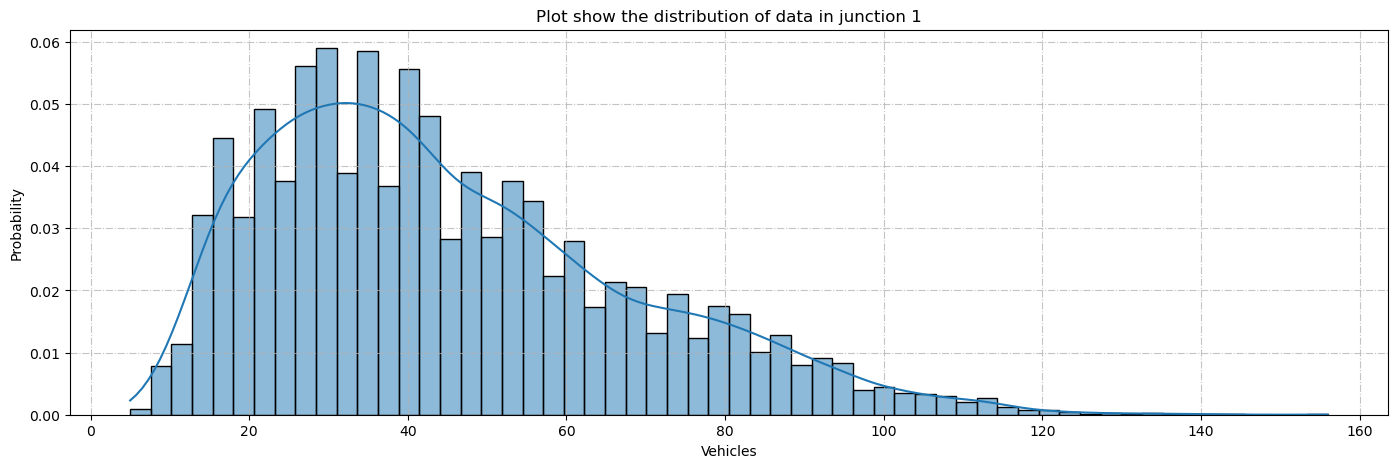

In [18]:
make_hist(1)

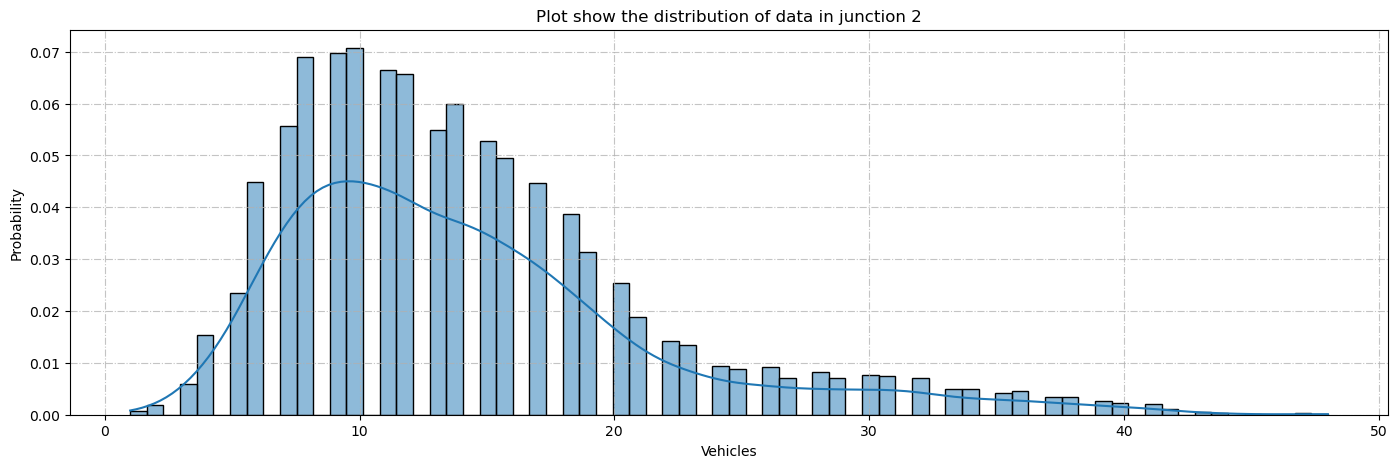

In [19]:
make_hist(2)

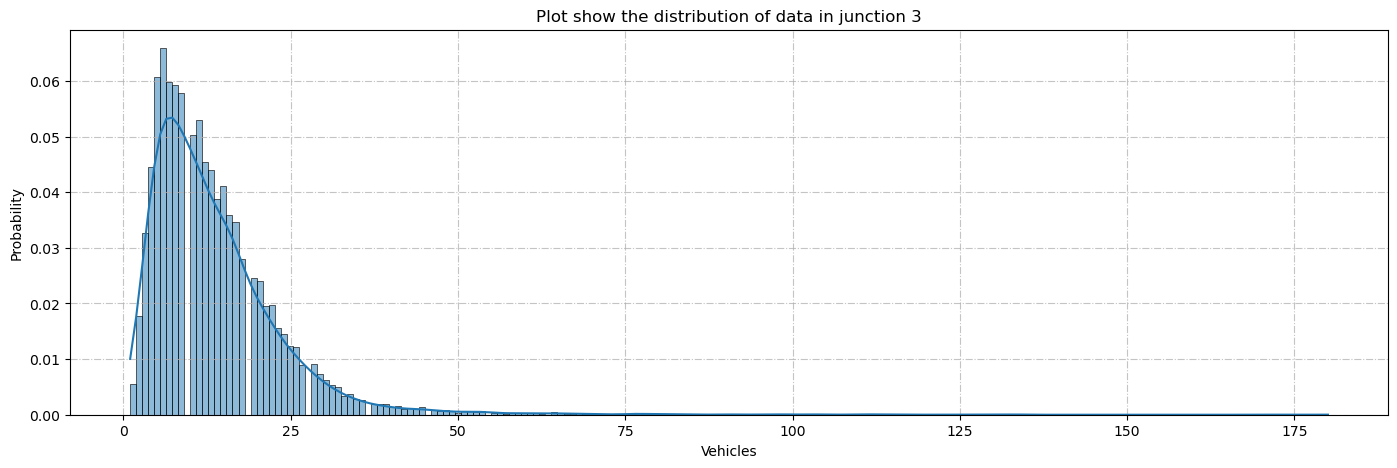

In [20]:
make_hist(3)

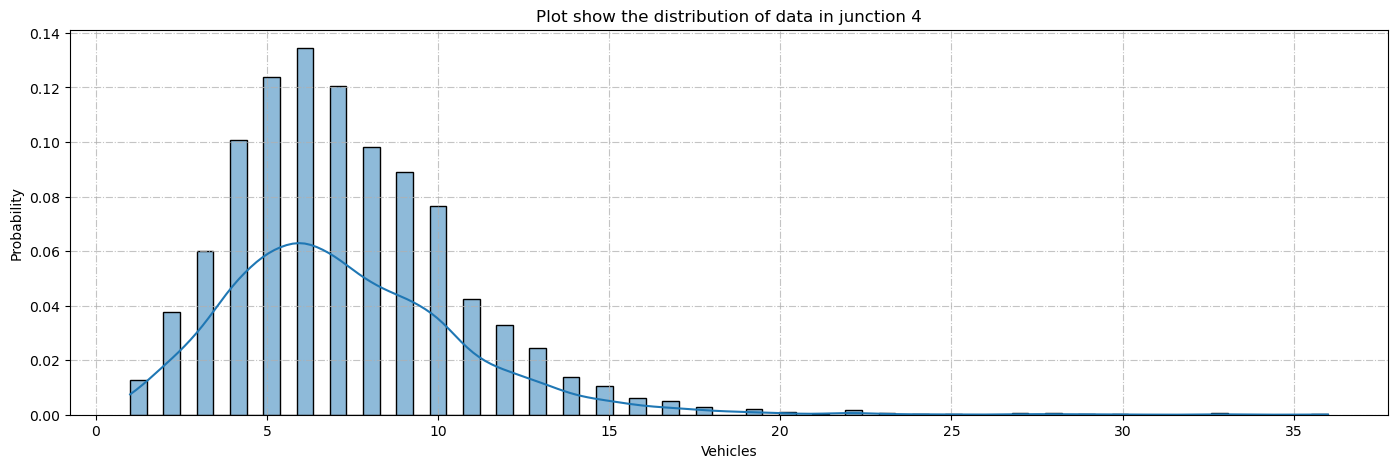

In [21]:
make_hist(4)

##### In 4 plot, its can show us that Vehicles in each junction is normal distribution with skew

In [23]:
df.tail(1).Year.iloc[0]


2017

In [24]:
def make_time_series_plot(junction=1):
    f, ax = plt.subplots(figsize=(17, 5))
    data=df[df.Junction == junction]
    ax = sns.lineplot(data=data, y='Vehicles', x='DateTime', ax=ax)
    start = data.head(1)
    end = data.tail(1)
    ax.set_title(f'Plot show amounts of Vehicles in junction {junction} from {start.Month.iloc[0]}-{start.Year.iloc[0]} to {end.Month.iloc[0]}-{end.Year.iloc[0]}', fontsize=15)
    ax.grid(True, ls='-.', alpha=0.75)
    plt.tight_layout()
    plt.show()

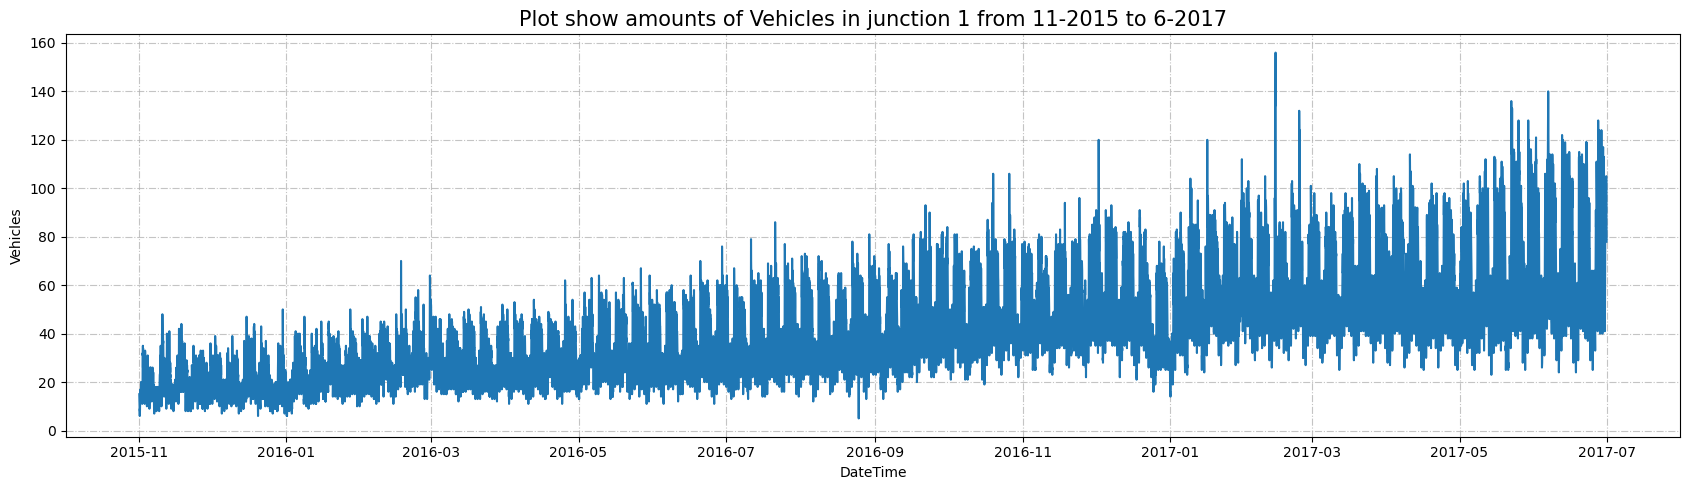

In [25]:
make_time_series_plot(1)

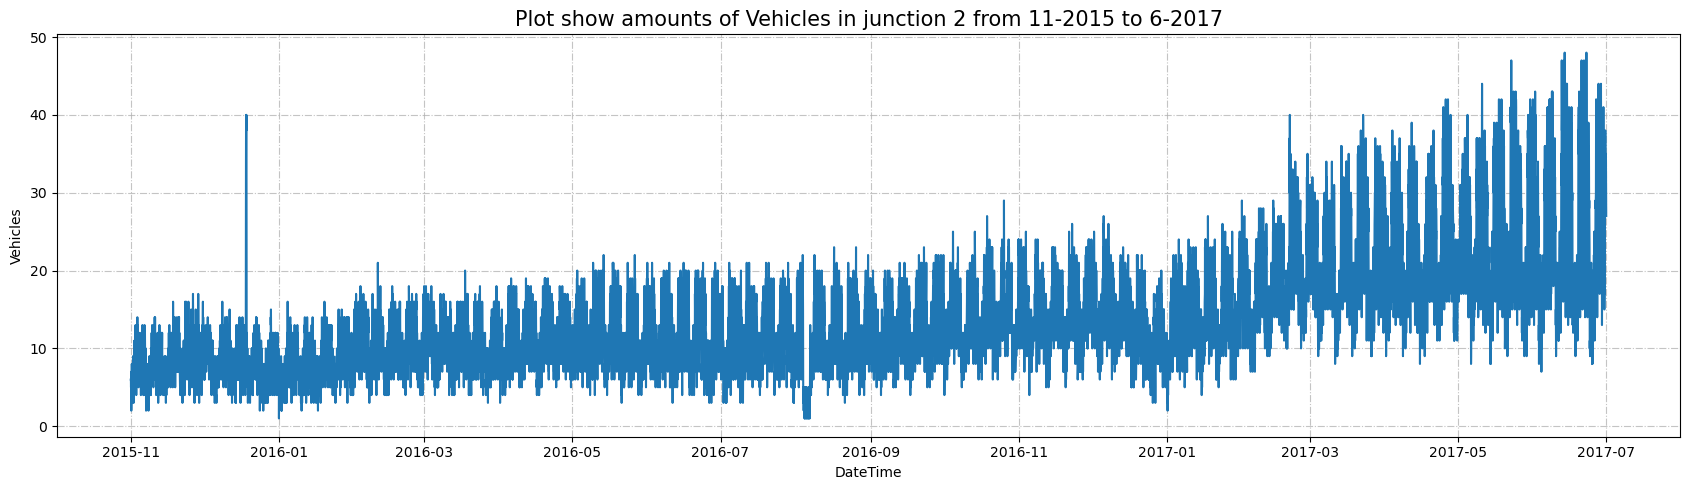

In [26]:
make_time_series_plot(2)

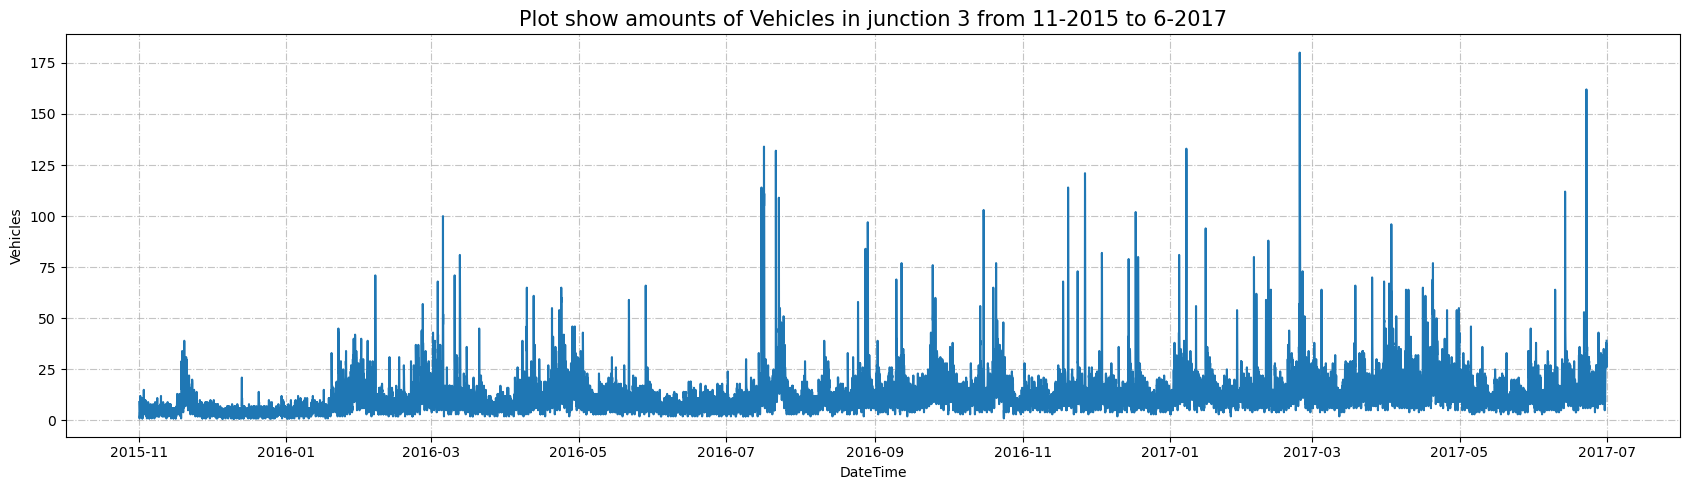

In [27]:
make_time_series_plot(3)

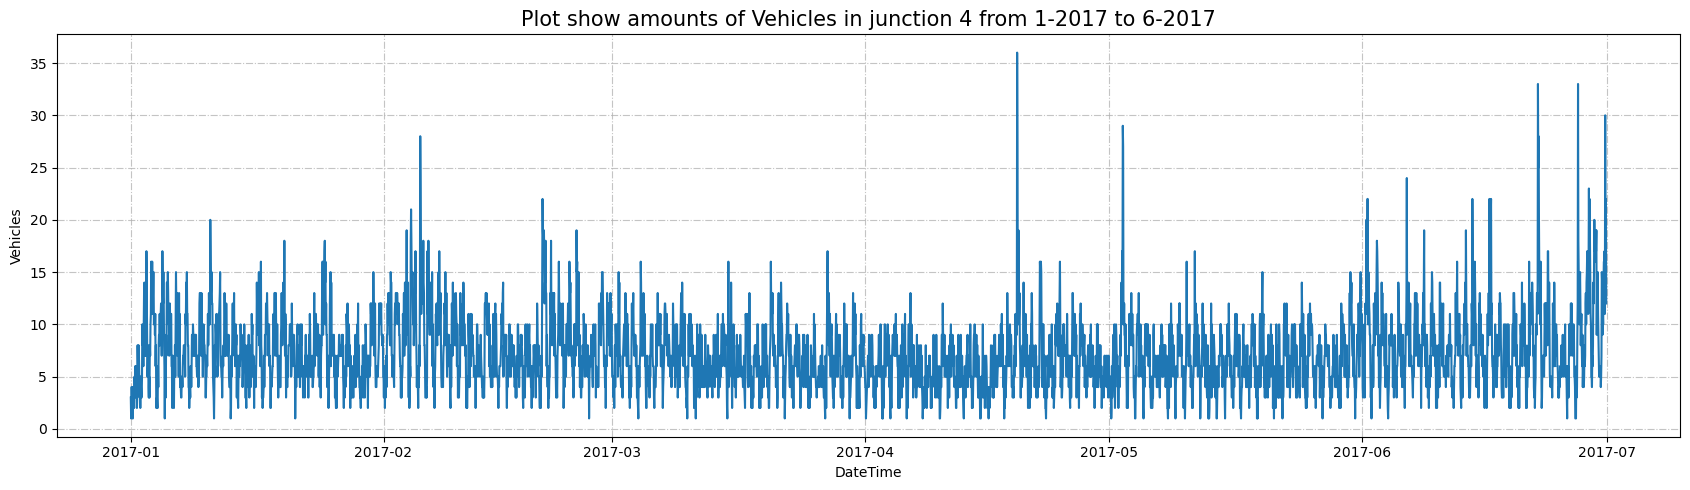

In [28]:
make_time_series_plot(4)

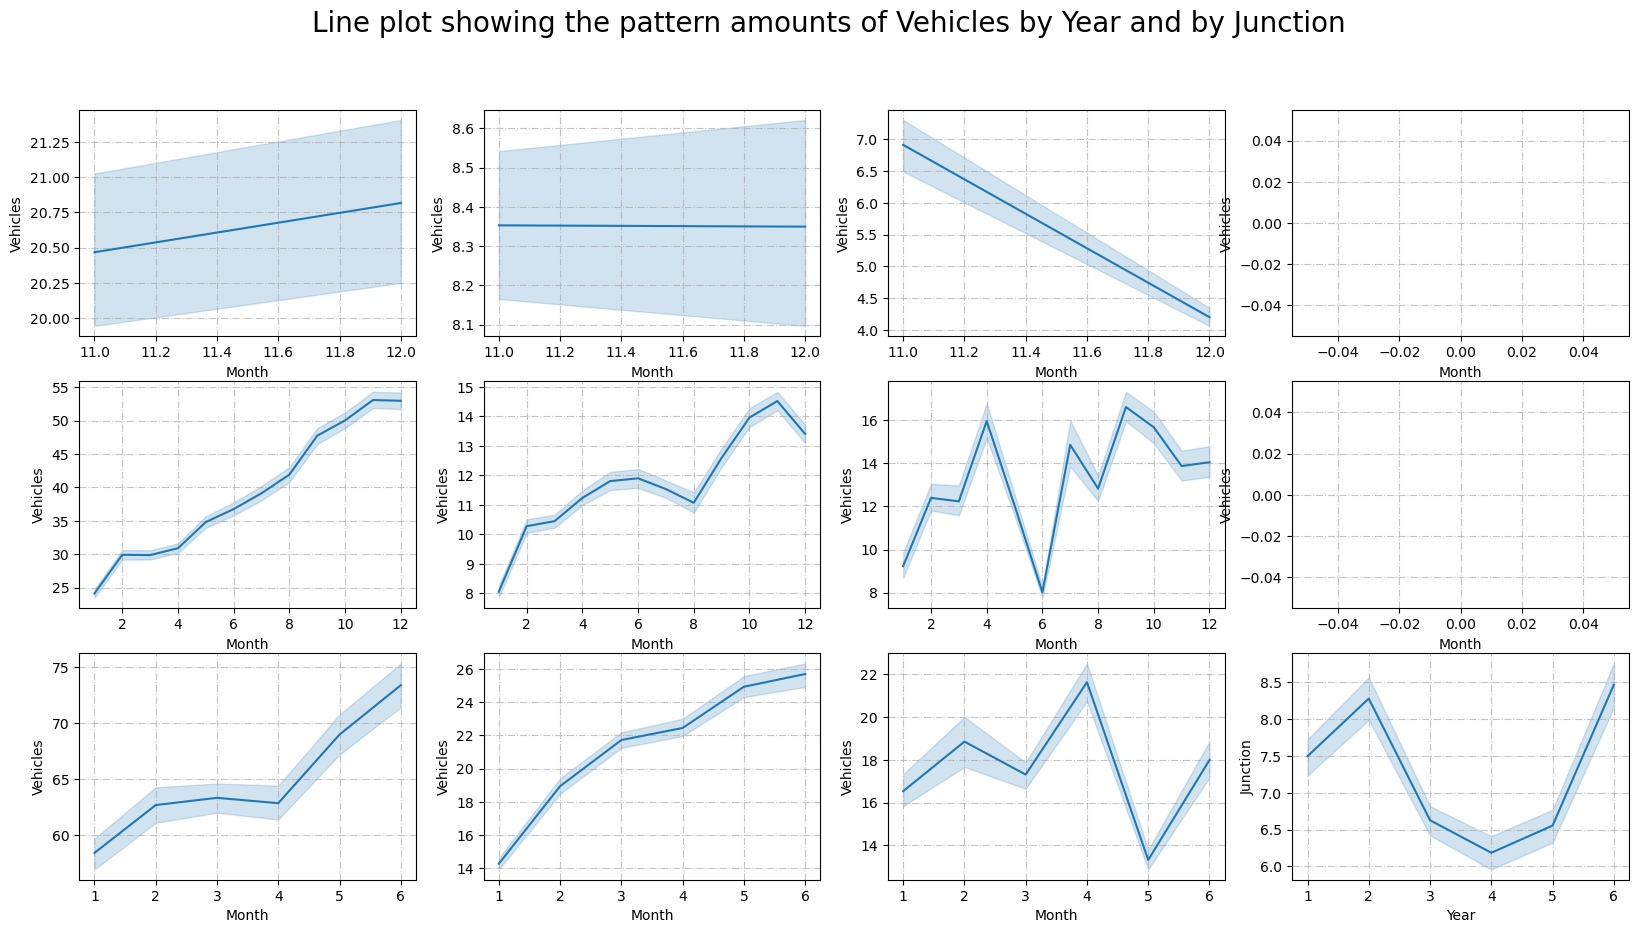

In [29]:
f, ax = plt.subplots(3, 4, figsize=(20, 10))

for i, year in enumerate(range(2015, 2018)):
  for j, junction in enumerate(range(1, 5)):
    sns.lineplot(data=df[(df.Junction == junction) & (df.Year == year)], x='Month', y='Vehicles', ax=ax[i, j])
    ax[i, j].grid(True, alpha=0.75, ls='-.')

plt.xlabel('Year')
plt.ylabel('Junction')
f.suptitle('Line plot showing the pattern amounts of Vehicles by Year and by Junction', fontsize=20)
plt.show()

##### Normal data histogram

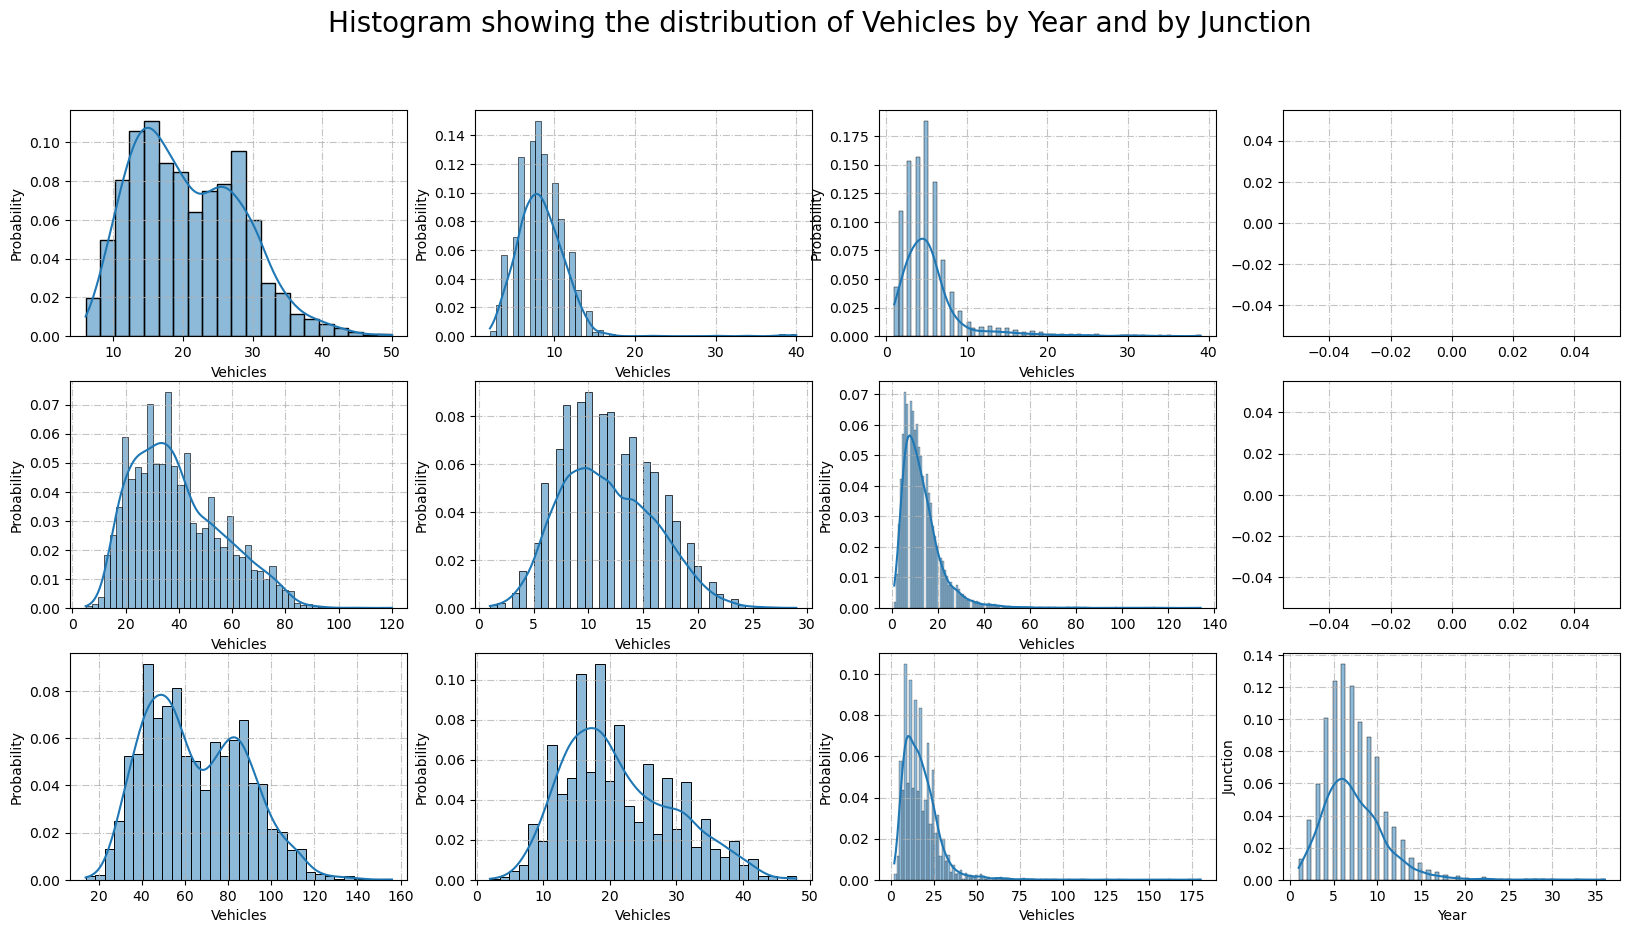

In [31]:
f, axis = plt.subplots(3, 4, figsize=(20, 10))

for i, year in enumerate(range(2015, 2018)):
  for j, junction in enumerate(range(1, 5)):
    sns.histplot(df[(df.Junction == junction) & (df.Year == year)]['Vehicles'], kde=True, ax=axis[i, j], stat='probability')
    axis[i, j].grid(True, alpha=0.75, ls='-.')

plt.xlabel('Year')
plt.ylabel('Junction')
f.suptitle('Histogram showing the distribution of Vehicles by Year and by Junction', fontsize=20)
plt.show()

##### Z Score data distribution and Histogram with Z Score Vehicles form Data

Mean = 
0
Standard Deviation = 1

In [33]:
standardization = lambda x: StandardScaler().fit_transform(x)

In [34]:
z_df = df.copy()
z_df['Vehicles'] = standardization(z_df.Vehicles.values.reshape(-1, 1))
z_df.head()

Junction  Vehicles  Year  Month  Day  Hour
DateTime                                                       
2015-11-01 00:00:00         1 -0.375489  2015     11    1     0
2015-11-01 01:00:00         1 -0.471875  2015     11    1     1
2015-11-01 02:00:00         1 -0.616454  2015     11    1     2
2015-11-01 03:00:00         1 -0.761034  2015     11    1     3
2015-11-01 04:00:00         1 -0.664648  2015     11    1     4

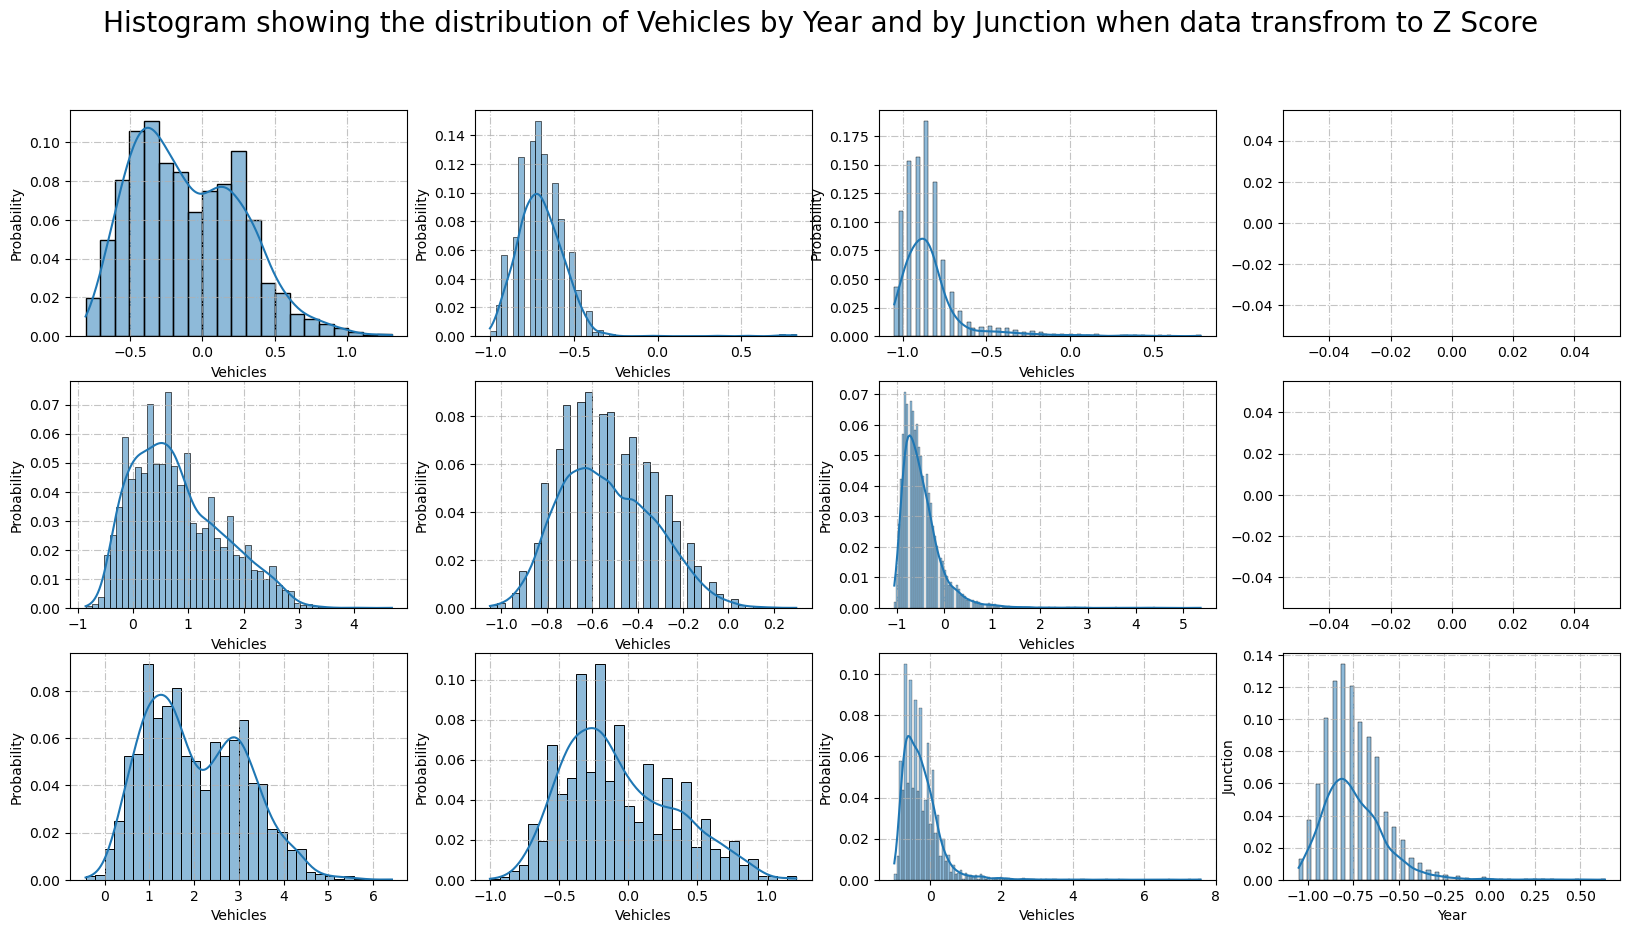

In [35]:
f, axis = plt.subplots(3, 4, figsize=(20, 10))

for i, year in enumerate(range(2015, 2018)):
  for j, junction in enumerate(range(1, 5)):
    sns.histplot(z_df[(z_df.Junction == junction) & (z_df.Year == year)]['Vehicles'], kde=True, ax=axis[i, j], stat='probability')
    axis[i, j].grid(True, alpha=0.75, ls='-.')
    
plt.xlabel('Year')
plt.ylabel('Junction')
f.suptitle('Histogram showing the distribution of Vehicles by Year and by Junction when data transfrom to Z Score', fontsize=20)
plt.show()


##### Boxplot for Vehicles

In boxplot, we can see a lot of outliers (those which is the dot)

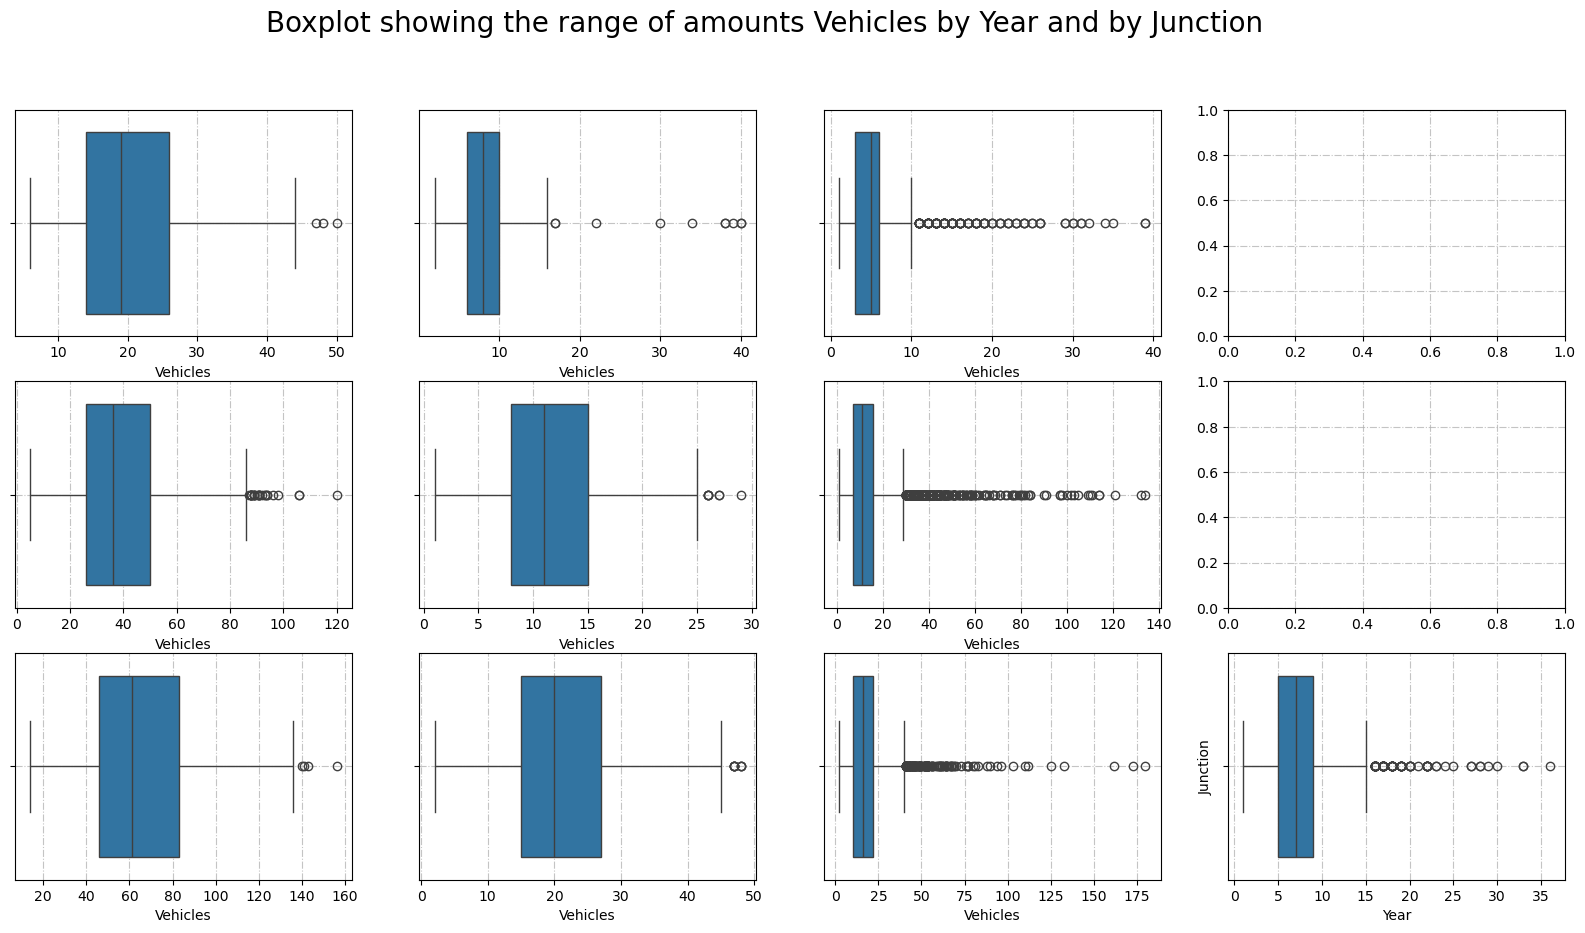

In [37]:
f, axis = plt.subplots(3, 4, figsize=(20, 10))

for i, year in zip(range(3), range(2015, 2018)):
  for j, junction in zip(range(4), range(1, 5)):
    sns.boxplot(x=df[(df.Junction == junction) & (df.Year == year)]['Vehicles'], ax=axis[i, j])
    axis[i, j].grid(True, alpha=0.75, ls='-.')

plt.xlabel('Year')
plt.ylabel('Junction')
f.suptitle('Boxplot showing the range of amounts Vehicles by Year and by Junction', fontsize=20)
plt.show()

##### Heatmap about data attributes .ther.

##### The value closer to 1 or -1 is best correlation to each other.

##### As close as to -1, that pair of attribute is more negative correlation.

##### As close as to 1, that pair of attribute is more positive correlation.

##### As close as to 0, that pair of attribute is not correlating to each other.

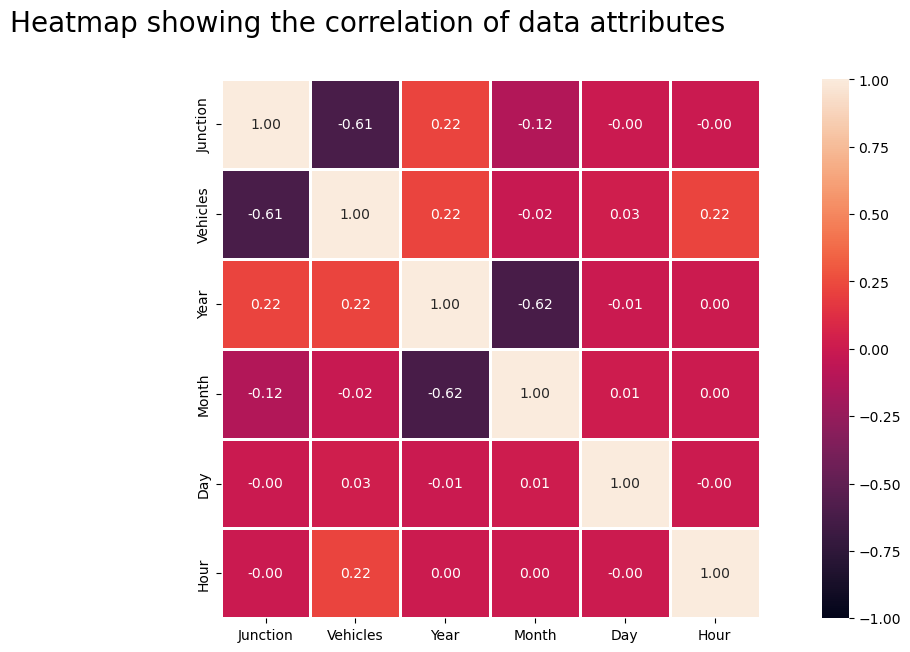

In [43]:
corr = df.corr()
f, ax = plt.subplots(figsize=(16, 7))
sns.heatmap(corr, annot=True, fmt='.2f', vmin=-1, vmax=1, square=True, linewidths=1)
f.suptitle('Heatmap showing the correlation of data attributes', fontsize=20)
plt.show()

In [44]:
def get_list_data(dataf, drop=[]):
  # drop cột DateTime ở các data
  for i in drop:
    try:
      dataf.drop(drop, axis=1, inplace=True)
    except:
      print(f"{i} doesn't has in data")
  # create a list of dataframe has the data in that junction and remove the junction identify
  dataf = [dataf[dataf.Junction == i].drop('Junction', axis=1) for i in range(5)]
  return dataf

In [45]:
data = get_list_data(df)
for i in data:
    print(i.head(1))

Empty DataFrame
Columns: [Vehicles, Year, Month, Day, Hour]
Index: []
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2015-11-01        15  2015     11    1     0
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2015-11-01         6  2015     11    1     0
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2015-11-01         9  2015     11    1     0
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2017-01-01         3  2017      1    1     0


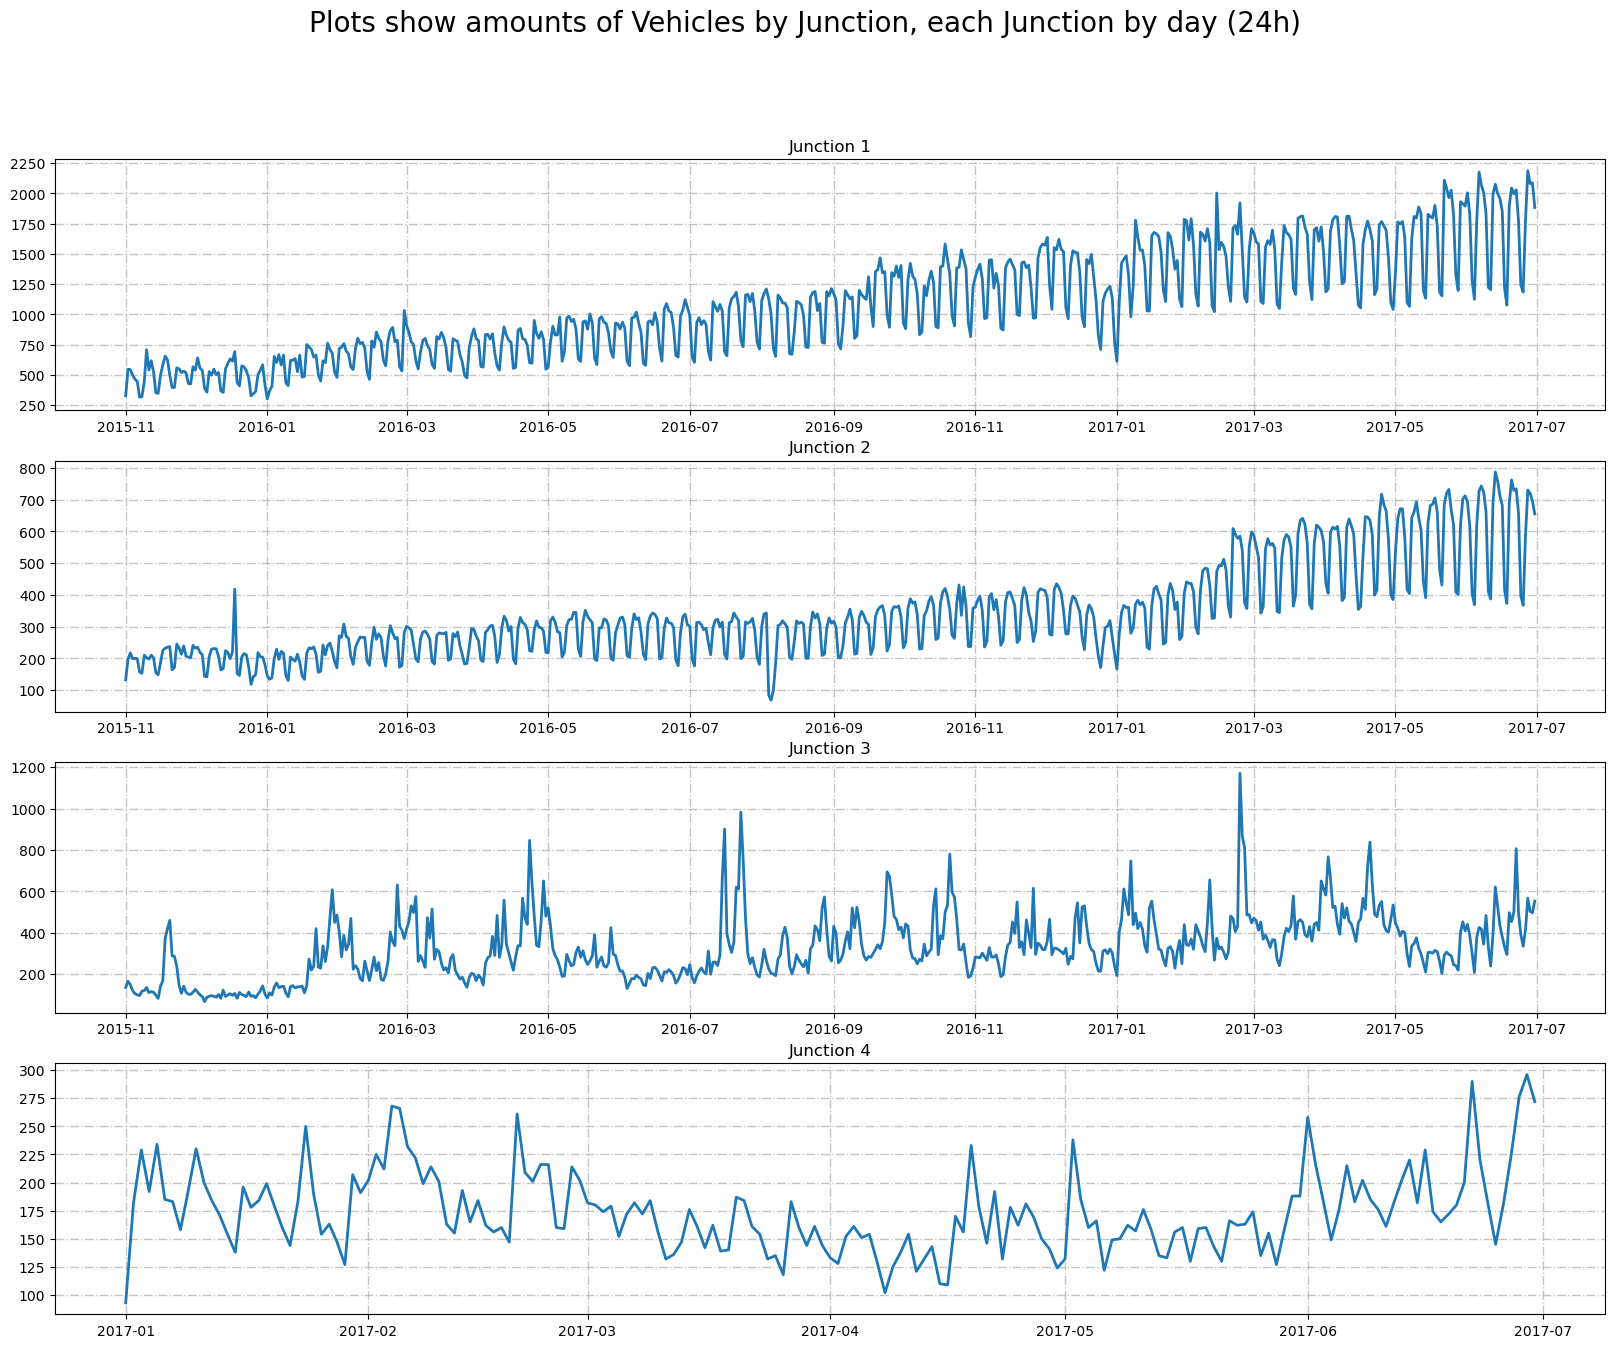

In [46]:
f, ax = plt.subplots(nrows=4, figsize=(20, 15))
for i in range(4):
    ax[i].plot(data[i + 1].resample('D').sum().Vehicles, label=f'Vehicles of {i + 1} Junction', lw=2)
    ax[i].grid(True, alpha=0.75, lw=1, ls='-.')
    ax[i].set_title(f'Junction {i + 1}')
f.suptitle('Plots show amounts of Vehicles by Junction, each Junction by day (24h)', fontsize=20);

C:\Users\nites\AppData\Local\Temp\ipykernel_924\3858306562.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ax[i].plot(data[i + 1].resample('M').sum().Vehicles, label=f'Vehicles of {i + 1} Junction', lw=2)


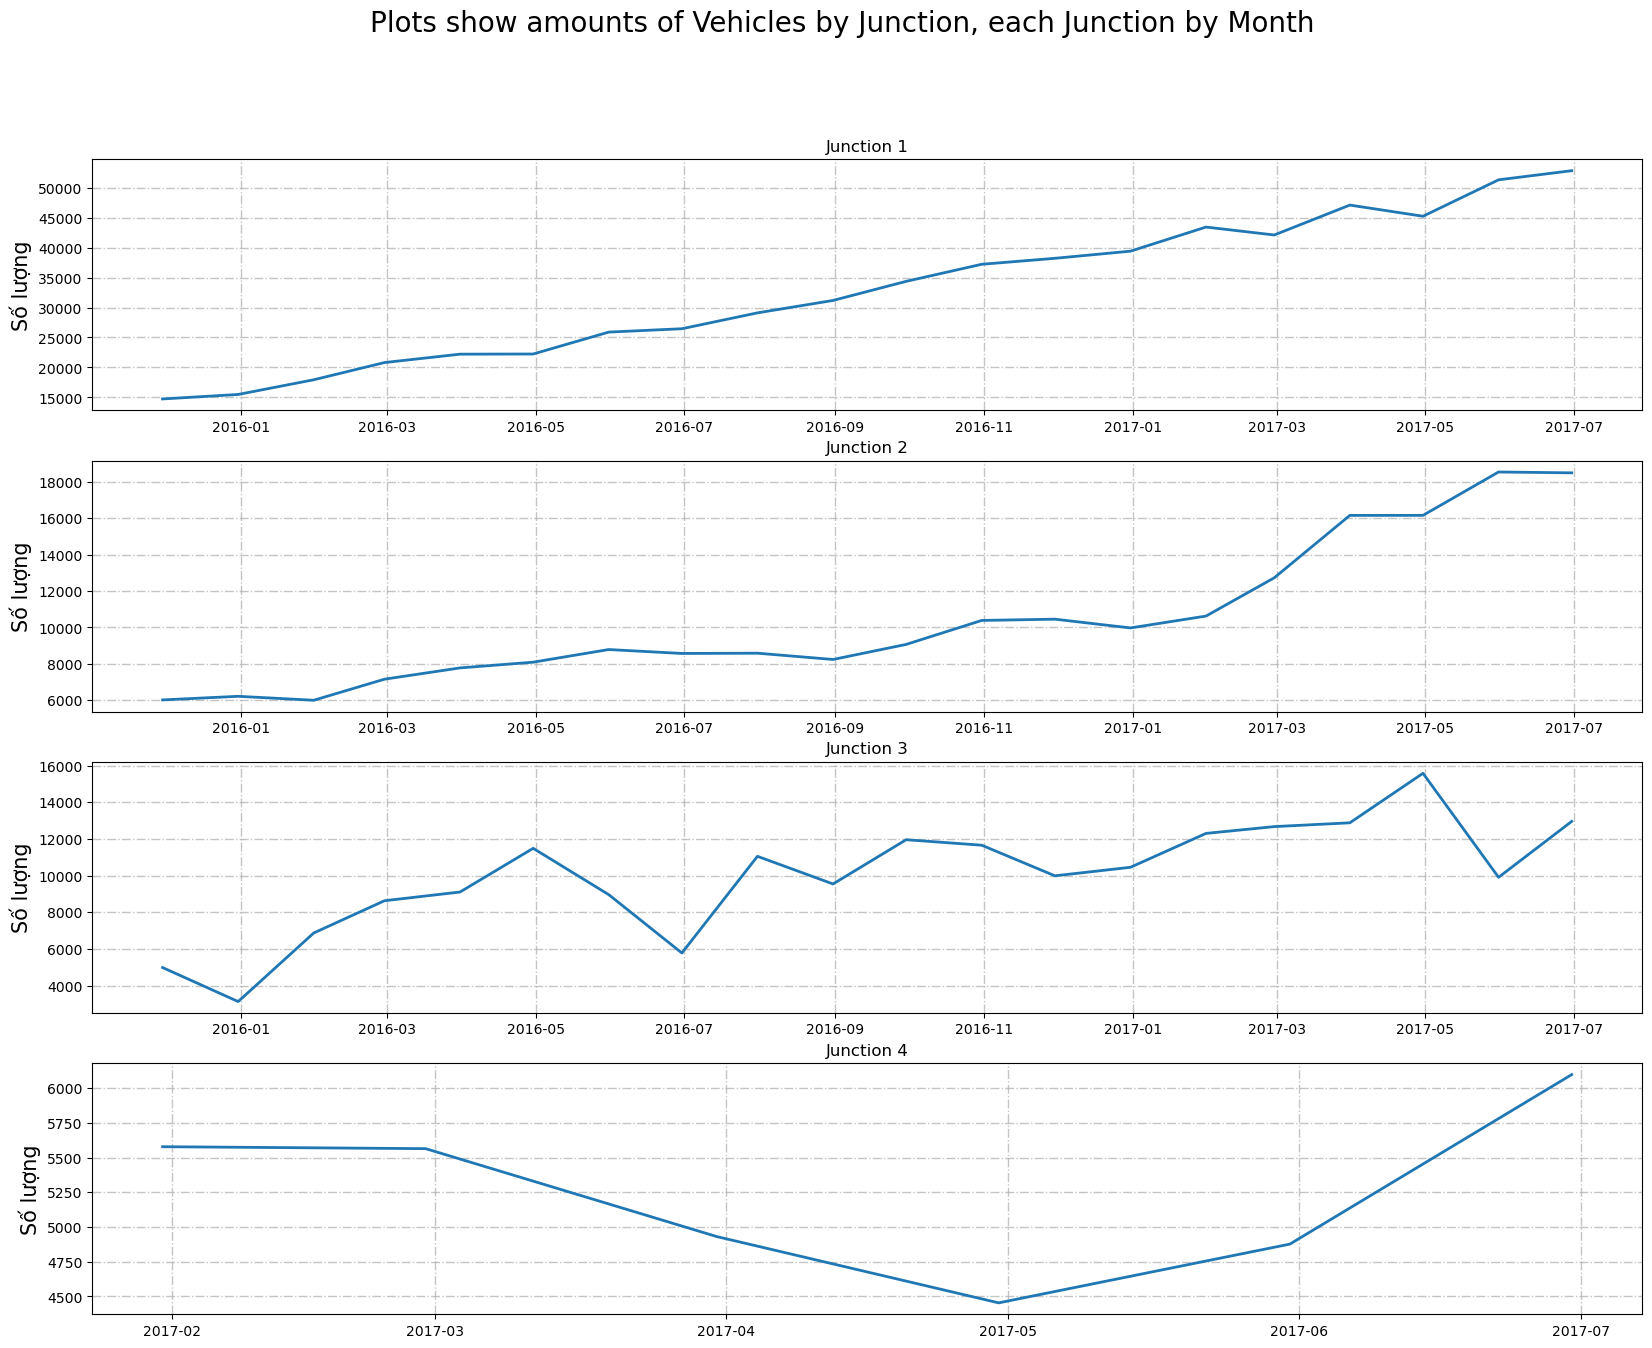

In [47]:
f, ax = plt.subplots(nrows=4, figsize=(20, 15))
for i in range(4):
    ax[i].plot(data[i + 1].resample('M').sum().Vehicles, label=f'Vehicles of {i + 1} Junction', lw=2)
    ax[i].grid(True, alpha=0.75, lw=1, ls='-.')
    ax[i].set_ylabel('Số lượng', fontsize=15)
    ax[i].set_title(f'Junction {i + 1}')
f.suptitle('Plots show amounts of Vehicles by Junction, each Junction by Month', fontsize=20);

C:\Users\nites\AppData\Local\Temp\ipykernel_924\2818733317.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ax[i].plot(data[i + 1].resample('12H').sum().Vehicles, label=f'Vehicles of {i + 1} Junction', lw=1)


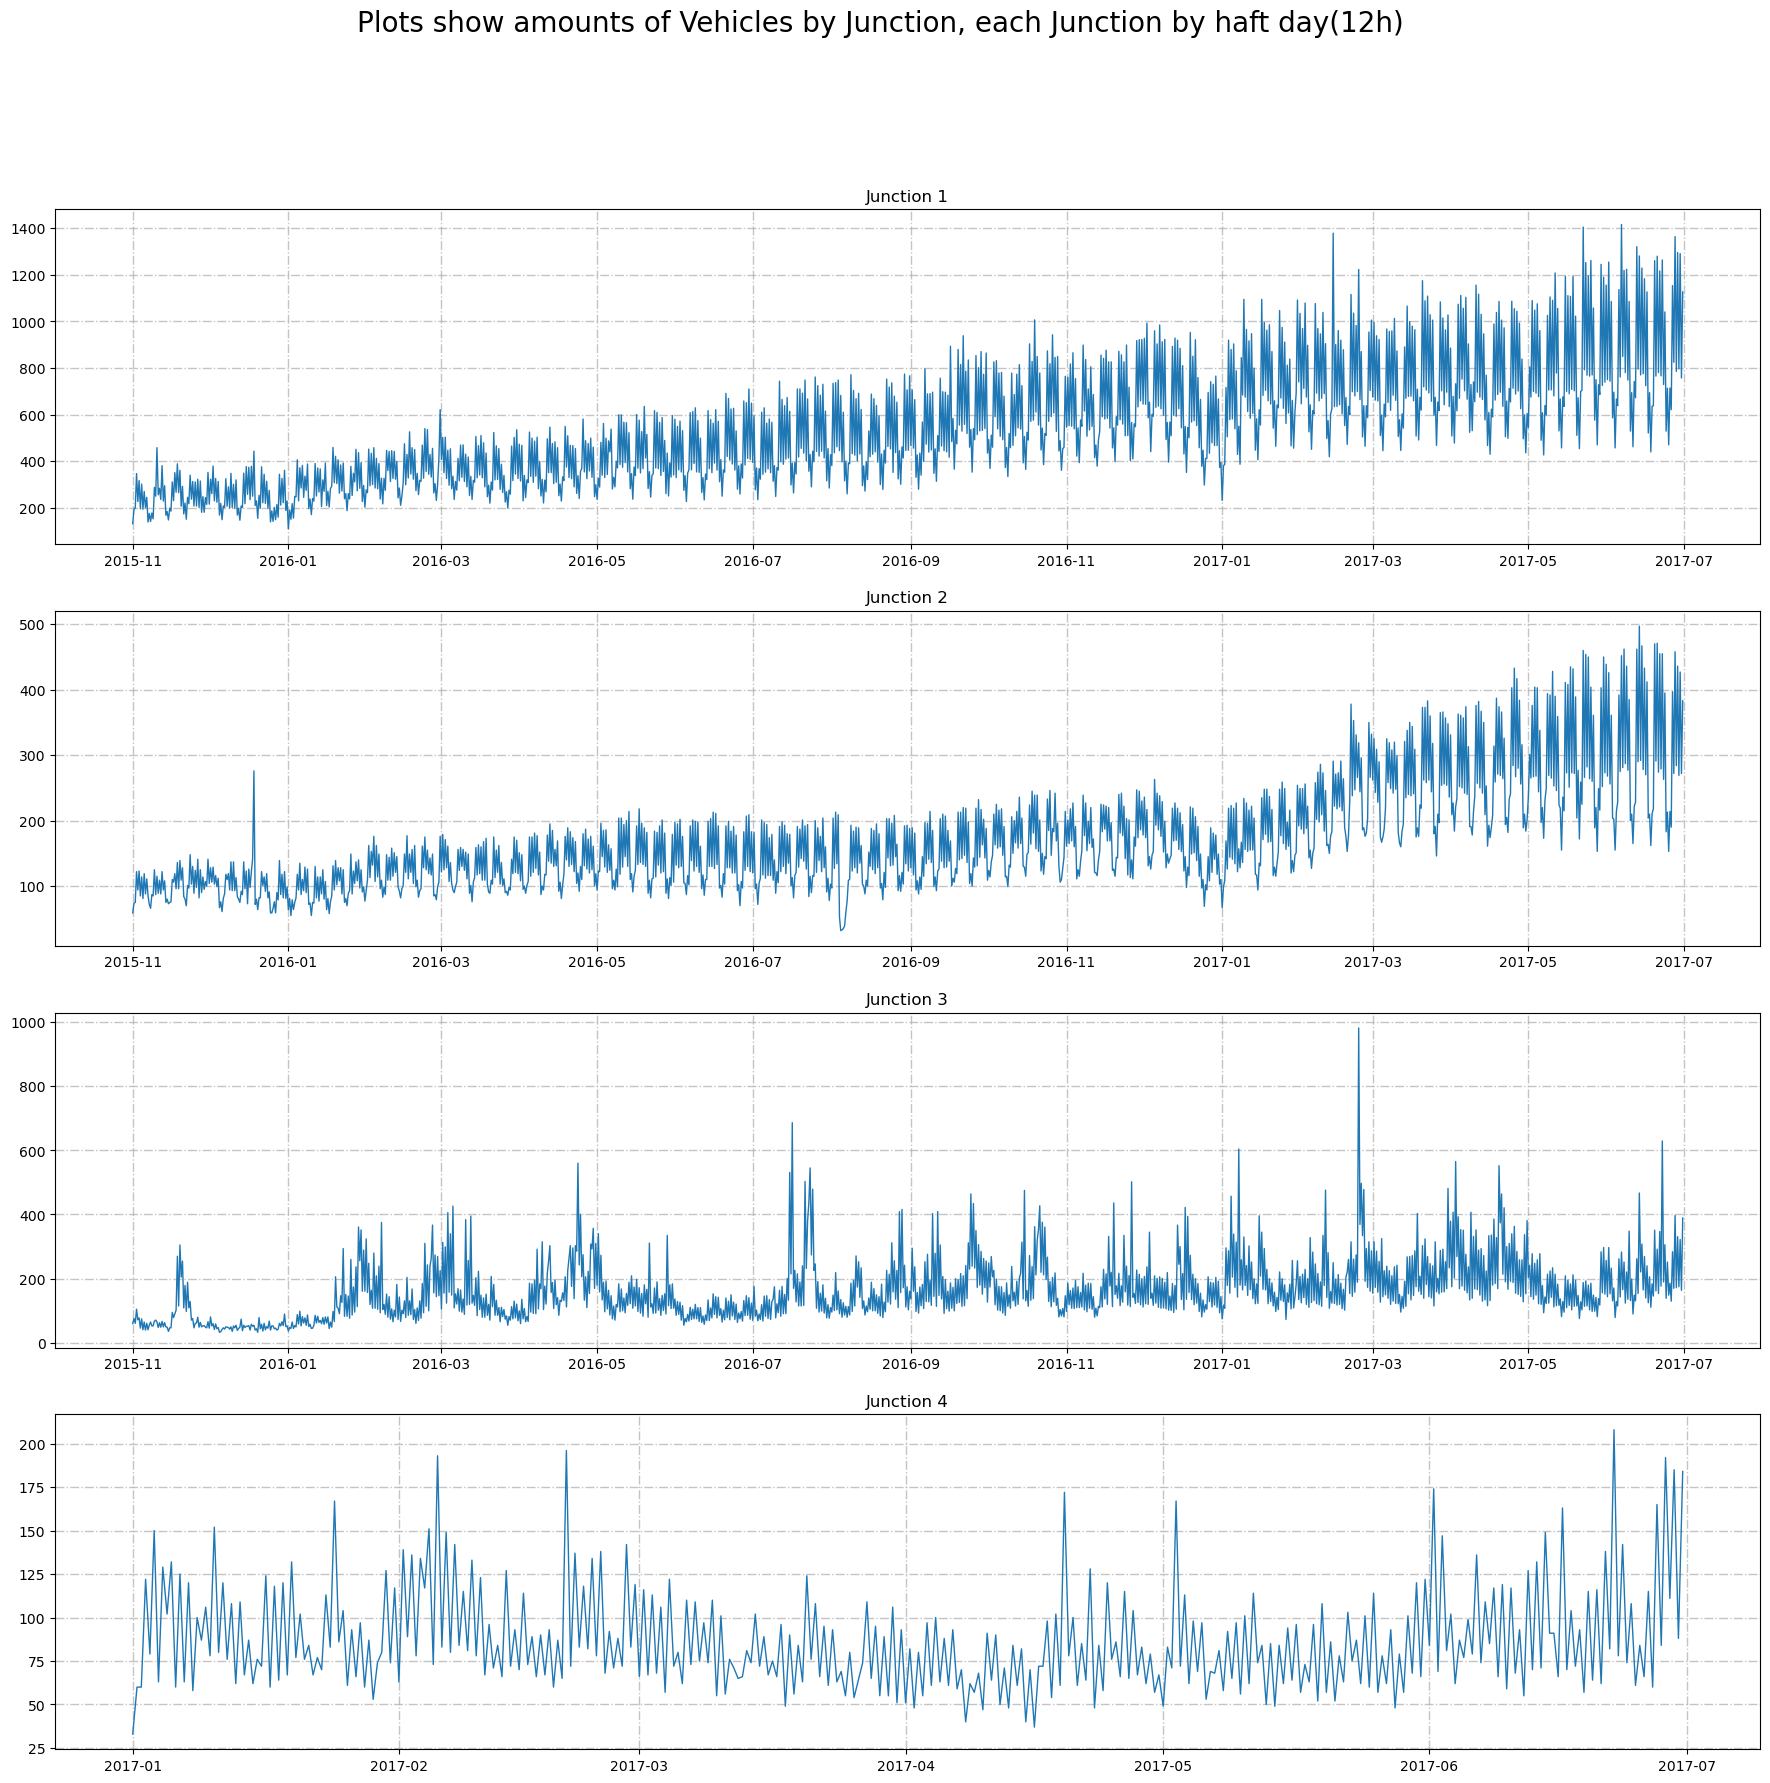

In [48]:
f, ax = plt.subplots(nrows=4, figsize=(22, 20))
for i in range(4):
    ax[i].plot(data[i + 1].resample('12H').sum().Vehicles, label=f'Vehicles of {i + 1} Junction', lw=1)
    ax[i].grid(True, alpha=0.75, lw=1, ls='-.')
    ax[i].set_title(f'Junction {i + 1}')
f.suptitle('Plots show amounts of Vehicles by Junction, each Junction by haft day(12h)', fontsize=20);

C:\Users\nites\AppData\Local\Temp\ipykernel_924\787364447.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ax[i].plot(data[i + 1].resample('6H').sum().Vehicles, label=f'Vehicles of {i + 1} Junction', lw=2)


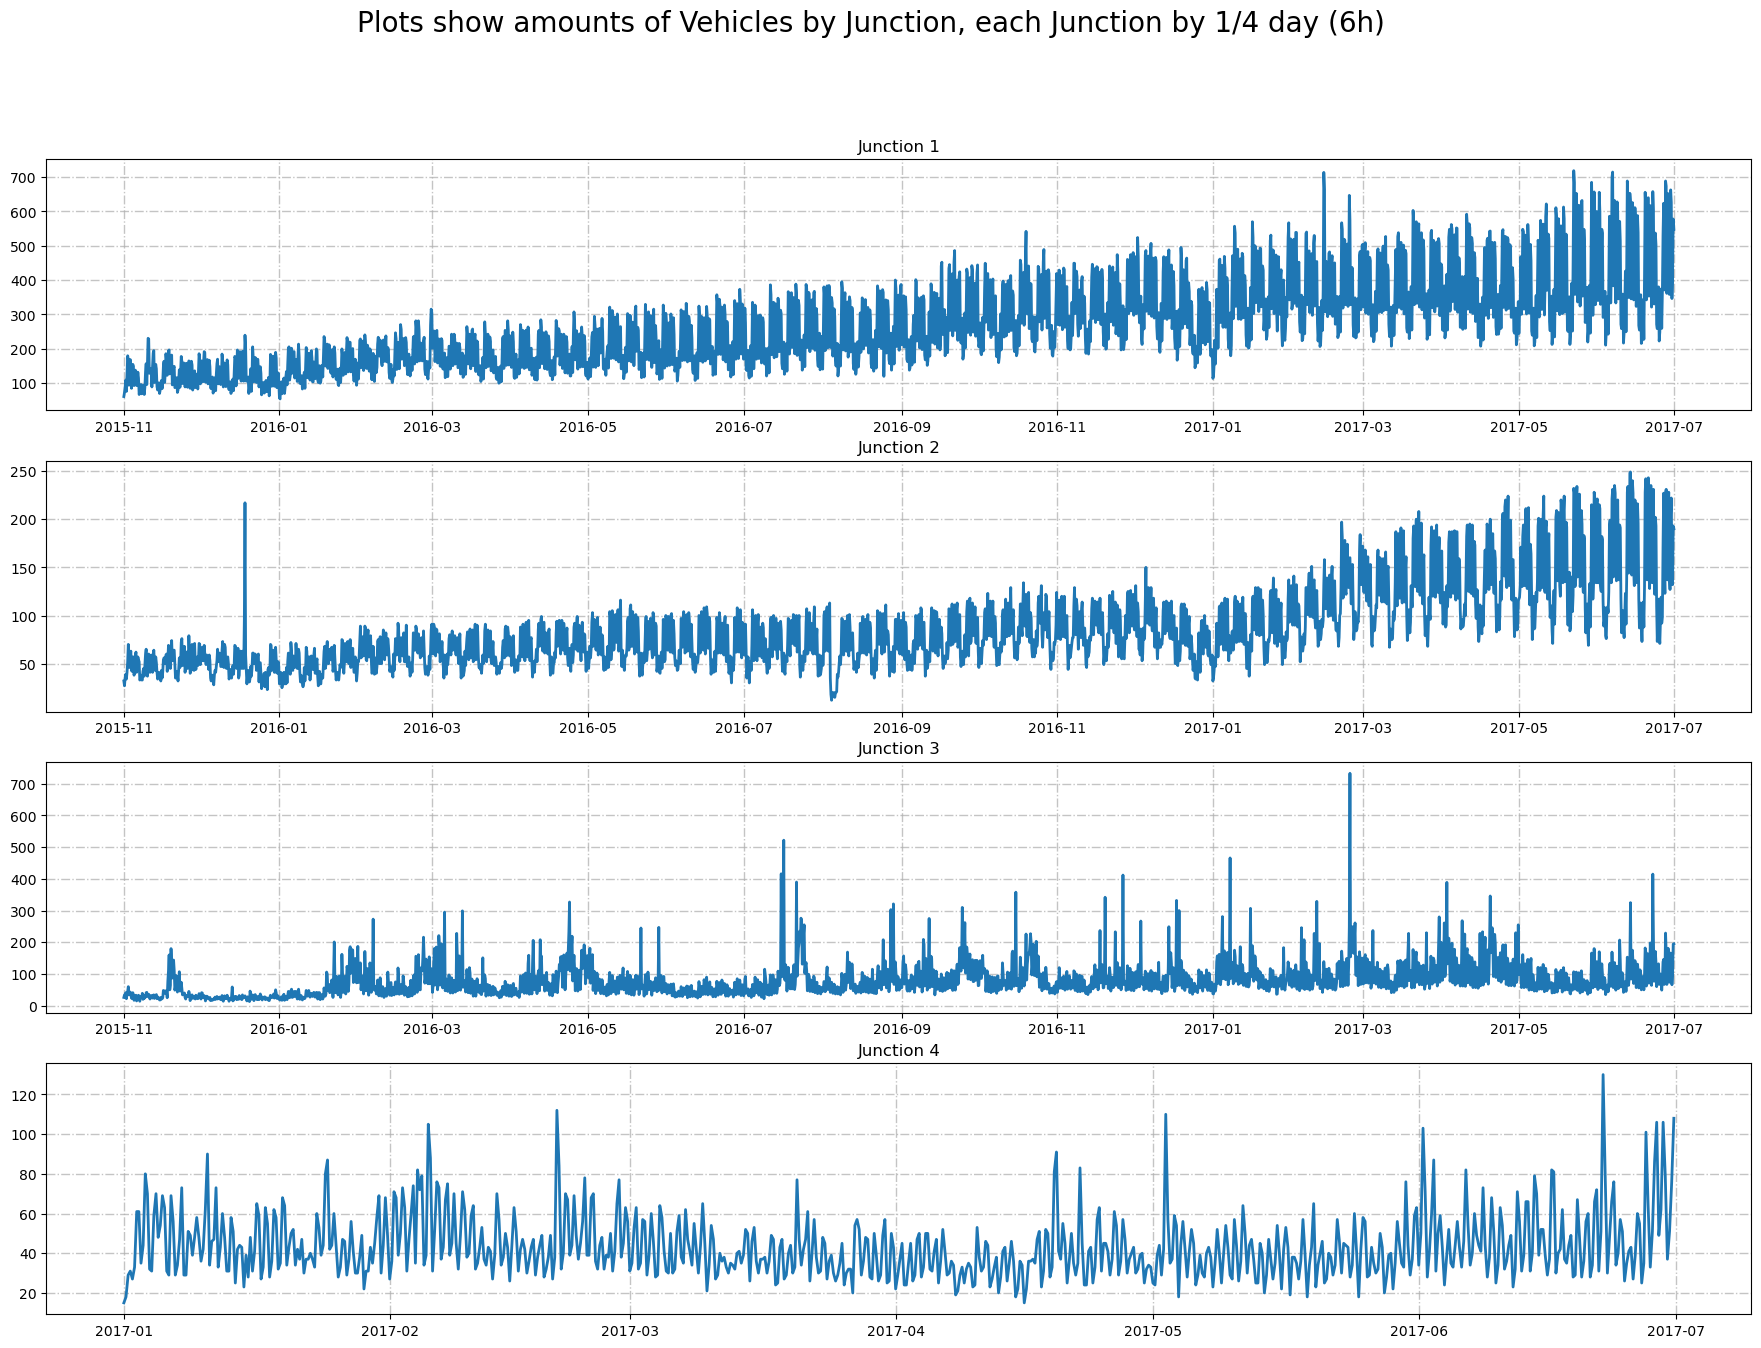

In [49]:
f, ax = plt.subplots(nrows=4, figsize=(22, 15))
for i in range(4):
    ax[i].plot(data[i + 1].resample('6H').sum().Vehicles, label=f'Vehicles of {i + 1} Junction', lw=2)
    ax[i].grid(True, alpha=0.75, lw=1, ls='-.')
    ax[i].set_title(f'Junction {i + 1}')
f.suptitle('Plots show amounts of Vehicles by Junction, each Junction by 1/4 day (6h)', fontsize=20);

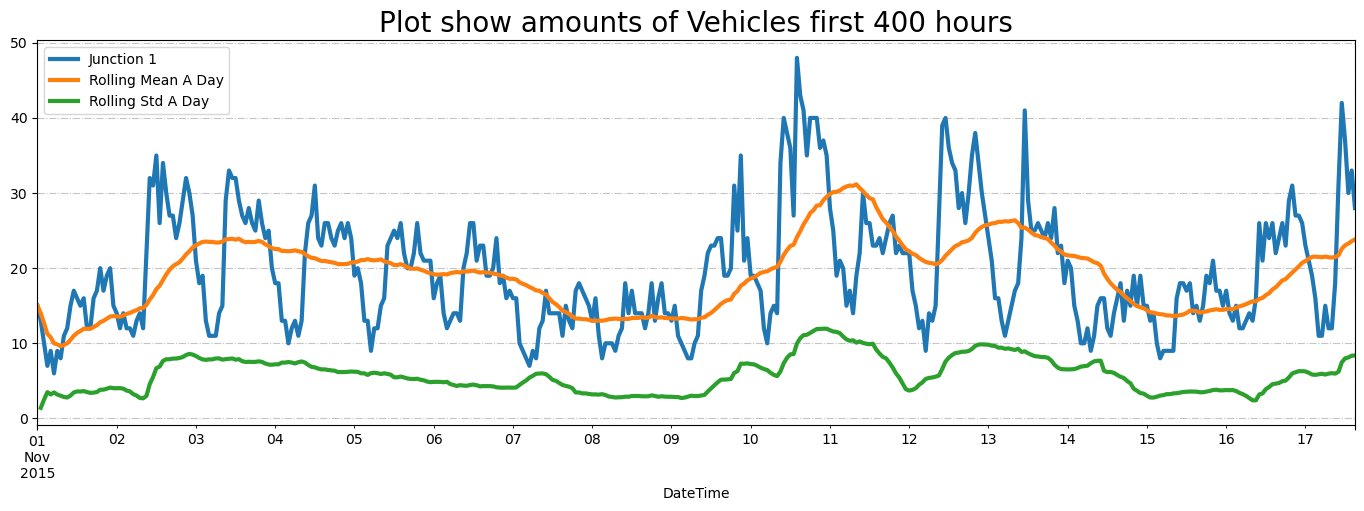

In [50]:
f, ax = plt.subplots(figsize=(17, 5))
foo = data[1][:400]
foo.Vehicles.plot(lw=3)
foo.Vehicles.rolling('D').mean().plot(lw=3)
foo.Vehicles.rolling('D').std().plot(lw=3)
plt.legend(['Junction 1', 'Rolling Mean A Day', 'Rolling Std A Day'])
plt.grid(True, alpha=0.75, ls='-.')
plt.title('Plot show amounts of Vehicles first 400 hours', fontsize=20)
plt.show()

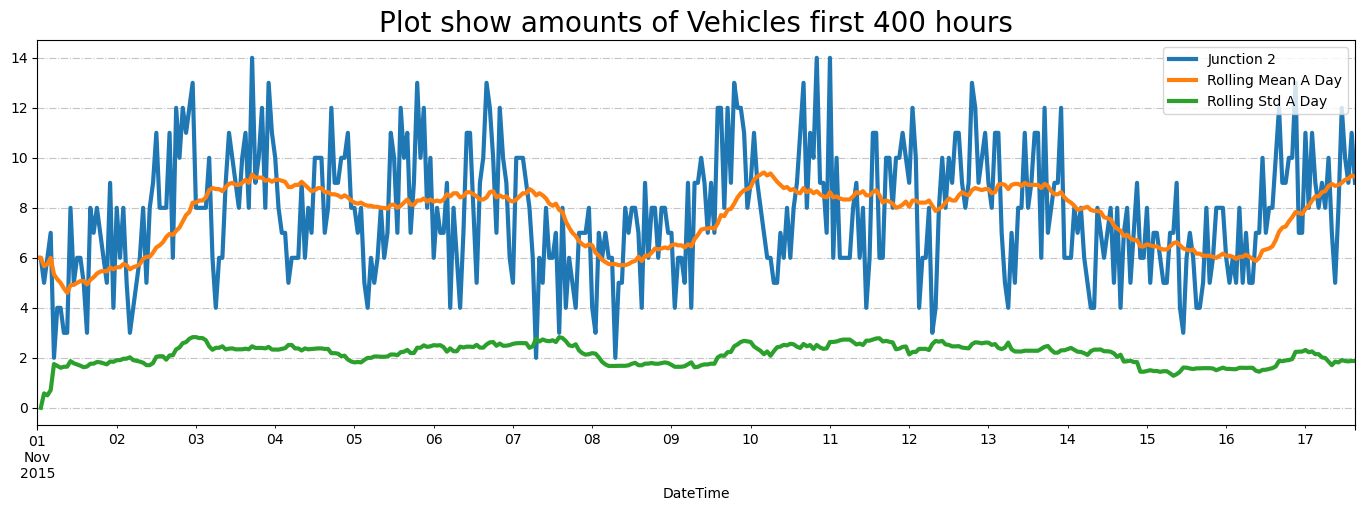

In [51]:
f, ax = plt.subplots(figsize=(17, 5))
foo = data[2][:400]
foo.Vehicles.plot(lw=3)
foo.Vehicles.rolling('D').mean().plot(lw=3)
foo.Vehicles.rolling('D').std().plot(lw=3)
plt.legend(['Junction 2', 'Rolling Mean A Day', 'Rolling Std A Day'])
plt.grid(True, alpha=0.75, ls='-.')
plt.title('Plot show amounts of Vehicles first 400 hours', fontsize=20)
plt.show()

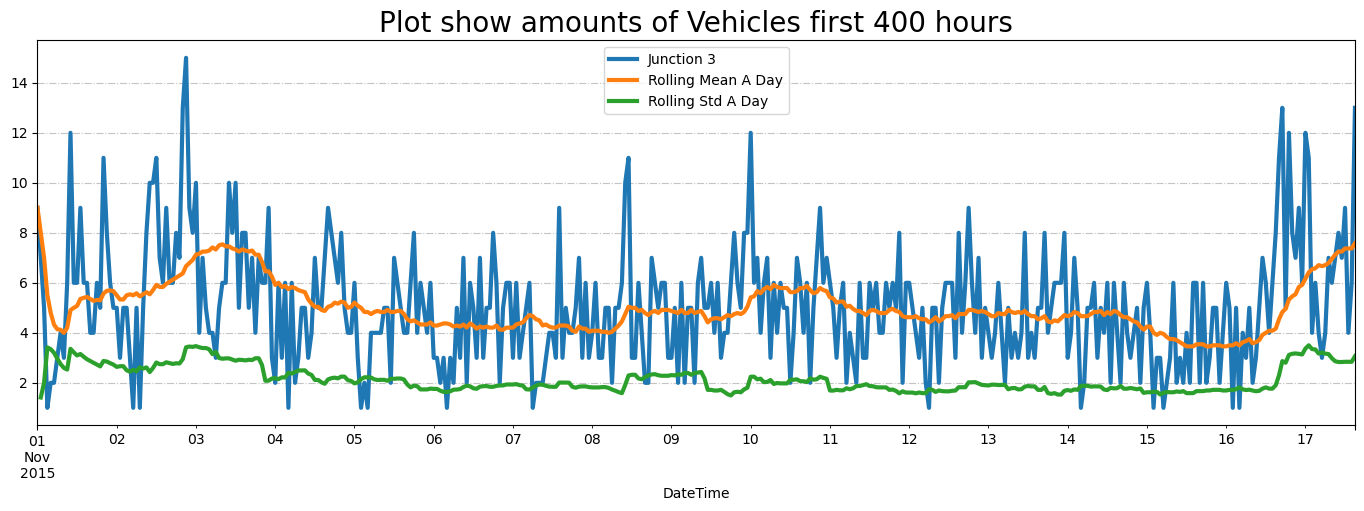

In [52]:
f, ax = plt.subplots(figsize=(17, 5))
foo = data[3][:400]
foo.Vehicles.plot(lw=3)
foo.Vehicles.rolling('D').mean().plot(lw=3)
foo.Vehicles.rolling('D').std().plot(lw=3)
plt.legend(['Junction 3', 'Rolling Mean A Day', 'Rolling Std A Day'])
plt.grid(True, alpha=0.75, ls='-.')
plt.title('Plot show amounts of Vehicles first 400 hours', fontsize=20)
plt.show()

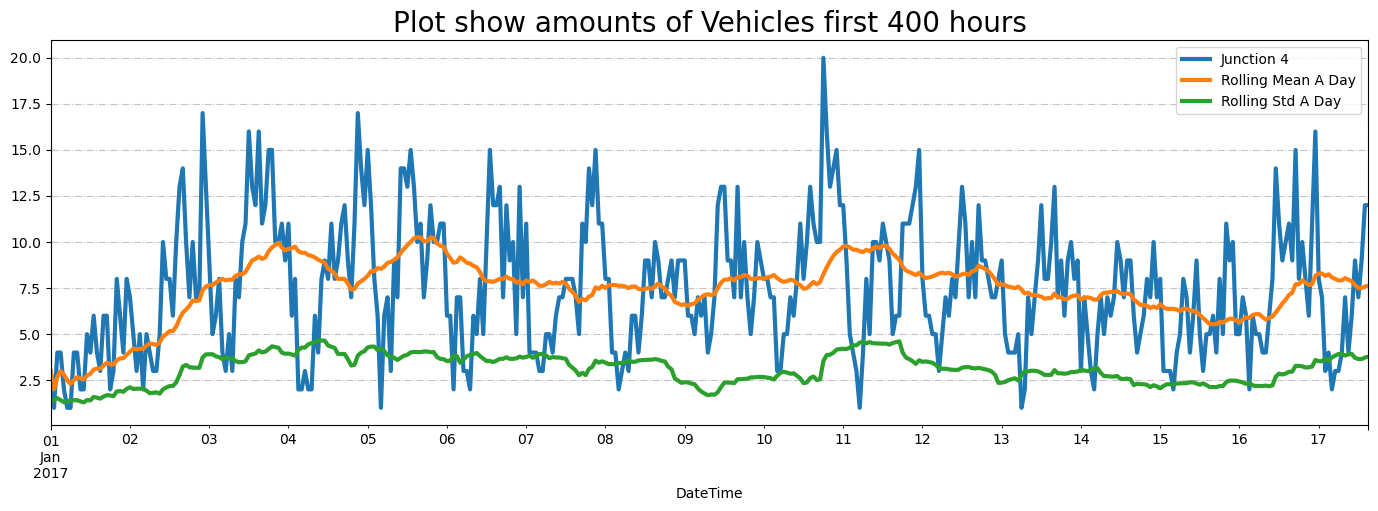

In [53]:
f, ax = plt.subplots(figsize=(17, 5))
foo = data[4][:400]
foo.Vehicles.plot(lw=3)
foo.Vehicles.rolling('D').mean().plot(lw=3)
foo.Vehicles.rolling('D').std().plot(lw=3)
plt.legend(['Junction 4', 'Rolling Mean A Day', 'Rolling Std A Day'])
plt.grid(True, alpha=0.75, ls='-.')
plt.title('Plot show amounts of Vehicles first 400 hours', fontsize=20)
plt.show()

##### Auto correlation plot

The data lie outside the blue has 95% effect to data

In [55]:
def make_autocorrelation(junction=1):
    f, ax = plt.subplots(figsize=(17, 6), nrows=2)
    plot_acf(data[junction].Vehicles, title=f"Autocorrelation of amounts of Vehicles in Junction {junction}", ax=ax[0])
    plot_pacf(data[junction].Vehicles, title=f"Partial Autocorrelation of amounts of Vehicles Junction {junction}", ax=ax[1])
    plt.show()

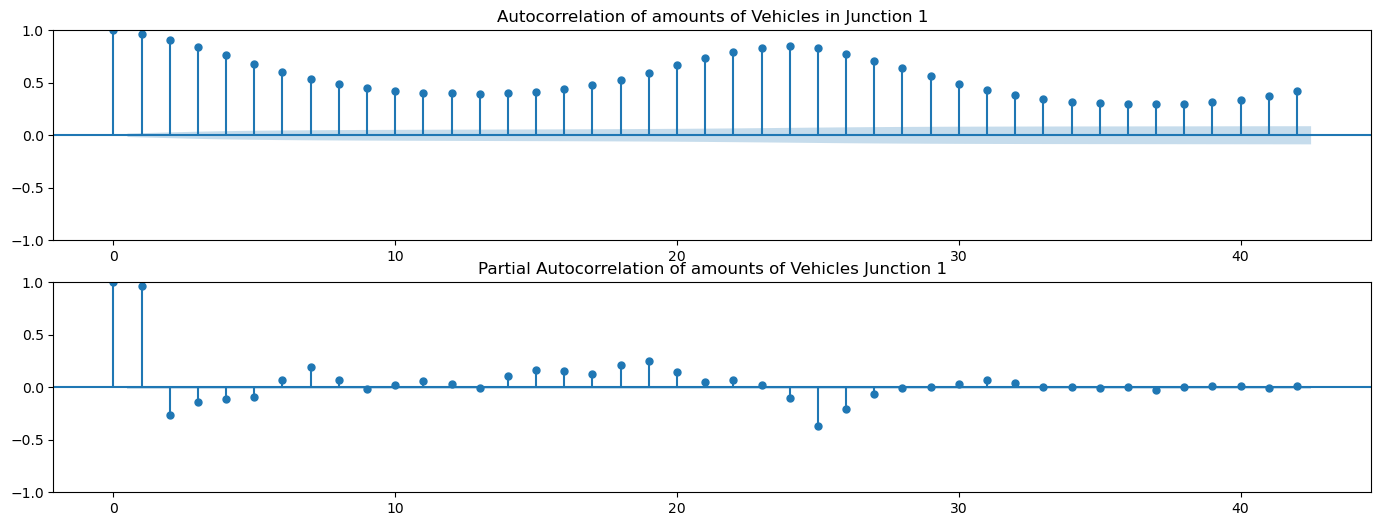

In [56]:
make_autocorrelation(1)

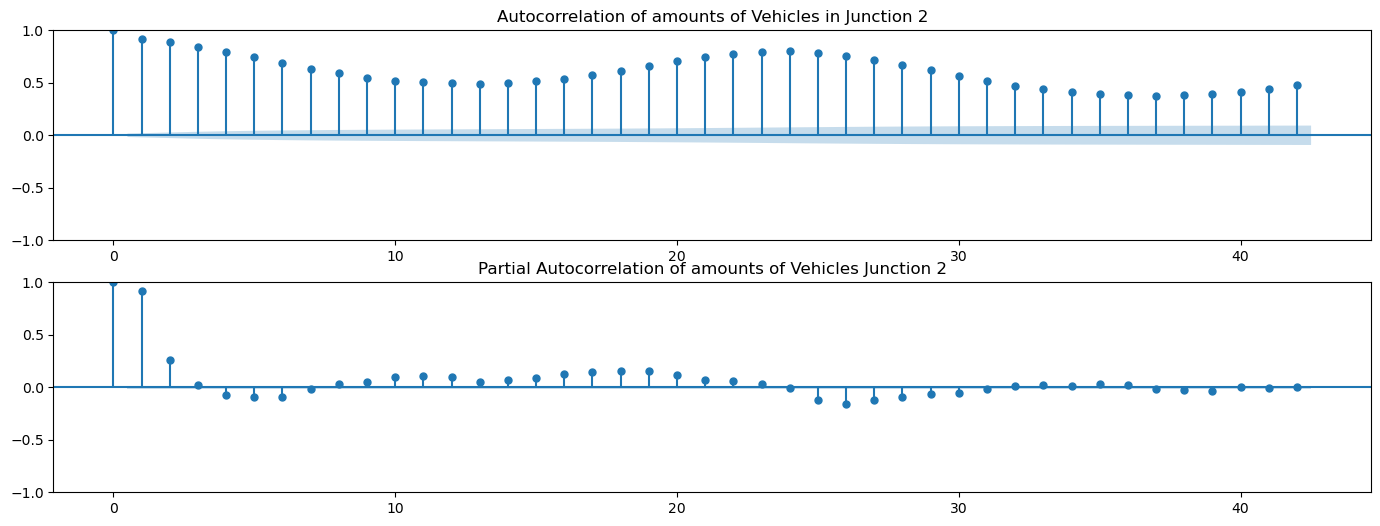

In [57]:
make_autocorrelation(2)

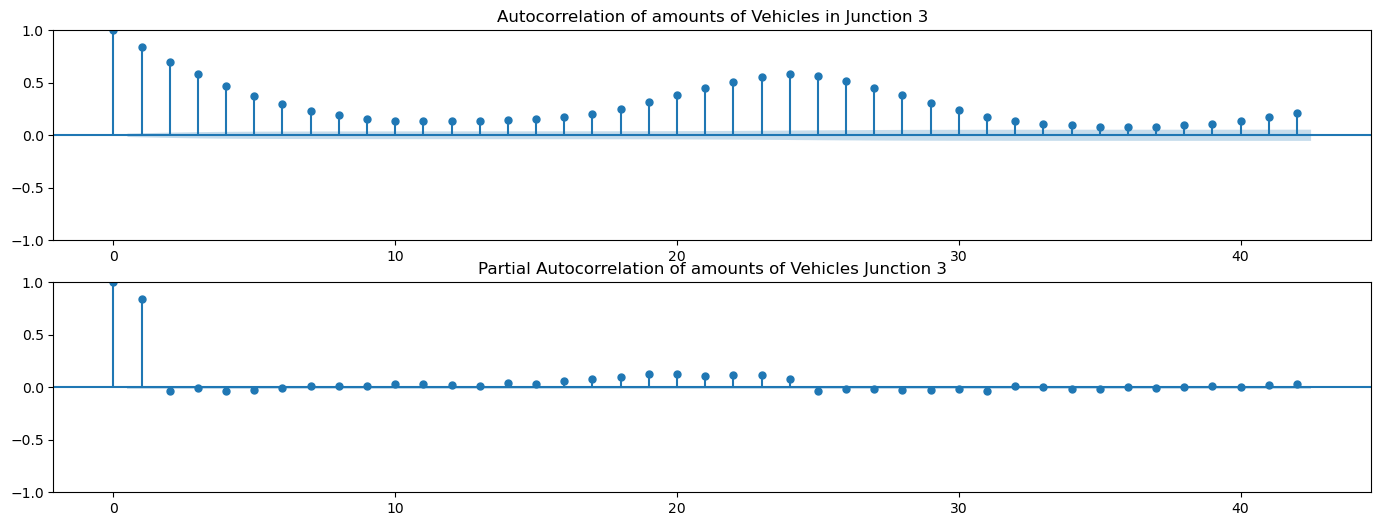

In [58]:
make_autocorrelation(3)

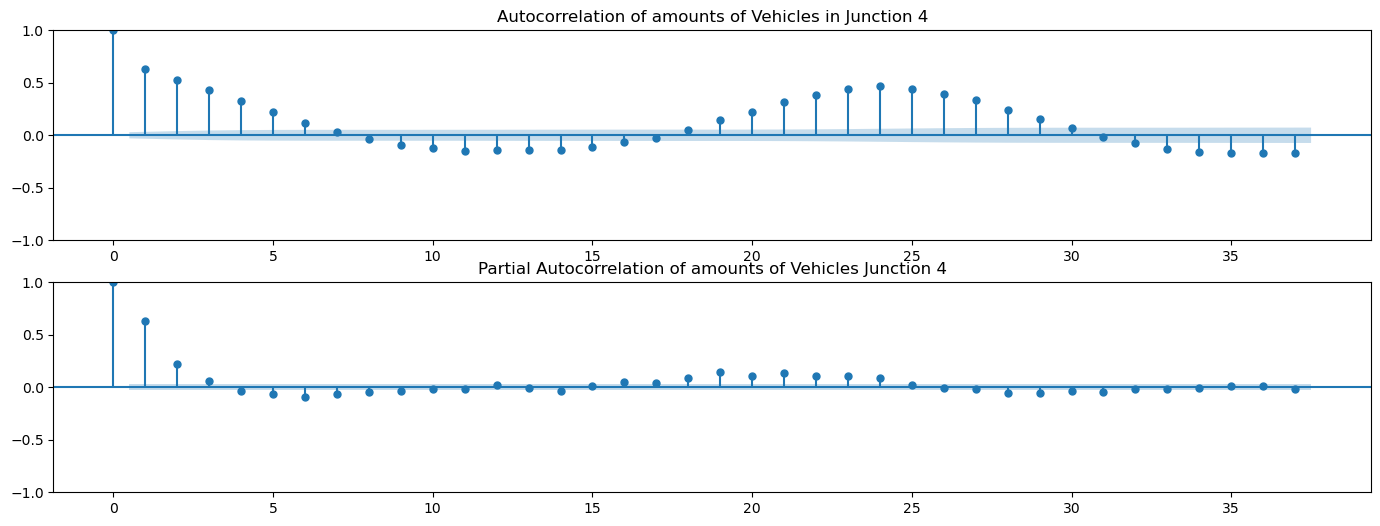

In [59]:
make_autocorrelation(4)

##### Month has negative correlation with Year
##### The correlation of Vehicles and Year is equal to Vehicles and Hour
##### Can drop Year or Hour because it's the same

#### Modeling¶
Create a make metrics function to return R² Score and RMSE from a list of models

In [62]:
def make_metrics(models):
    data = {
        'name': [model.name for model in models[1:]],
        'r2': [model.r2 for model in models[1:]],
        'rmse': [model.rmse for model in models[1:]]
    }
    data['name'] = 'average R2 and sum RMSE'
    data['r2'].append(np.mean(data['r2']))
    data['rmse'].append(np.sum(data['rmse']))
    return pd.DataFrame(data)

##### Create a function to create a new dataset

In [64]:
z_data = get_list_data(z_df)
for i in z_data:
    print(i.head(1))

Empty DataFrame
Columns: [Vehicles, Year, Month, Day, Hour]
Index: []
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2015-11-01 -0.375489  2015     11    1     0
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2015-11-01 -0.809227  2015     11    1     0
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2015-11-01 -0.664648  2015     11    1     0
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2017-01-01 -0.953806  2017      1    1     0


##### Create a class for a frame for machine learning model

In [66]:
class Model:
  def __init__(self, name, data, predict_features, test_size, ml_model):
    self.name = name
    self.data = data
    self.predict_features = predict_features
    self.is_trained = False
    self.test_size = test_size
    self.ml_model = ml_model
    self.do_things()

  def cal_rmse(self):
    self.rmse = mean_squared_error(self.ytest, self.ypredict, squared=False)
    return self.rmse

  def prequisite(self, test_size):
    self.features = [i for i in self.data.columns if i != self.predict_features]
    self.X = self.data[self.features].values
    self.y = self.data[self.predict_features].values
    self.Xtrain, self.Xtest, self.ytrain, self.ytest = train_test_split(self.X, self.y, test_size=test_size)
    return None

  def fit(self):
    self.is_trained = True
    self.ml_model.fit(self.Xtrain, self.ytrain)
    self.ypredict = self.ml_model.predict(self.Xtest)
    return self.ml_model

  def cal_r2_score(self):
    self.r2 = r2_score(self.ytest, self.ypredict)
    return self.r2

  def do_things(self) -> None:
    self.prequisite(self.test_size)
    self.fit()
    self.cal_rmse()
    self.cal_r2_score()
    return None

  def feature_importances(self, ax) -> None:
    feature_importances = self.ml_model.feature_importances_
    index = lag_models[1].features
    data = pd.DataFrame(pd.Series(feature_importances, index=index).nlargest(10)).reset_index()
    data.columns = ['Features', 'Value']
    g = sns.barplot(data=data, x='Features', y='Value', ax=ax)
    for p in g.patches:
        ax.annotate(
            format(p.get_height(), '.2f'),
            (p.get_x() + p.get_width() / 2, p.get_height() + 0.02),
            ha='center', va='center', weight='bold', fontsize=9
        )
    ax.set_title(f'Plot of {self.name}', fontsize=12)
    ax.grid(True, ls='-.', alpha=0.7)
    ax.set_ylim(0, 1)

  def __repr__(self) -> str:
    if not self.is_trained:
      return f'<{self.name}> (is not trained yet)>'
    return f'<({self.name}: [R² Score: {self.r2}], [RMSE: {self.rmse}])>'

##### Training models for 4 junction with normal data

In [68]:
models = [None]
for i in range(1, 5):
    models += [
        Model(
            ml_model=RandomForestRegressor(),
            name=f'Dataset of junction {i}',
            data=data[i],
            predict_features='Vehicles',
            test_size=1/4
        )
    ]
    
make_metrics(models)

C:\Users\nites\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\nites\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\nites\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\nites\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

name        r2       rmse
0  average R2 and sum RMSE  0.943370   5.483501
1  average R2 and sum RMSE  0.852871   2.774820
2  average R2 and sum RMSE  0.725572   5.531457
3  average R2 and sum RMSE  0.493840   2.449562
4  average R2 and sum RMSE  0.753913  16.239340

##### Training models for 4 junction with Z Score Normalization

In [119]:
z_models = [None]
for i in range(1, 5):
    z_models += [
        Model(
            ml_model=RandomForestRegressor(),
            name=f'Dataset of junction {i}',
            data=z_data[i],
            predict_features='Vehicles',
            test_size=1/4
        )
    ]

make_metrics(z_models)

C:\Users\nites\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\nites\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\nites\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\nites\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

name        r2      rmse
0  average R2 and sum RMSE  0.940439  0.272202
1  average R2 and sum RMSE  0.855978  0.134251
2  average R2 and sum RMSE  0.713470  0.262158
3  average R2 and sum RMSE  0.507338  0.113758
4  average R2 and sum RMSE  0.754306  0.782369

##### create lag data 

In [ ]:
def lag():
    